In [1]:
############ Did the %Leave vote of a constituency effect 

In [3]:
dataset_name = "W14_comb"
df_list = [
           "BES_Panel",
           "BES_reduced_with_na",
#            "BESnumeric"
#            "BES_reduced",
#            "BESnumeric"
          ]

In [4]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import pickle, os, gc, re

from IPython.display import display, display_html 

import Jupyter_module_loader
from utility import *
import gaussian_kde
# you should clone this git to a subdirectory called 'BES_analysis_code' (in some directory - I call it BES_analysis - doesn't matter though)
%matplotlib inline
encoding = "ISO-8859-1"

(BES_code_folder, BES_small_data_files, BES_data_folder,
 BES_output_folder, BES_file_manifest, BES_R_data_files) = setup_directories()


global BES_Panel, BES_numeric, BES_reduced, BES_reduced_with_na, BES_non_numeric
data_subfolder = BES_data_folder + dataset_name + os.sep

(manifest, dataset_filename, dataset_description, dataset_citation,
 dataset_start, dataset_stop, dataset_wave) = get_manifest(dataset_name, BES_file_manifest)

for df in df_list:
    if df=="BES_Panel":
        globals()[df]  = pd.read_msgpack(data_subfolder + dataset_filename.replace('.dta','.msgpack'))
    else:
        globals()[df]  = pd.read_msgpack(data_subfolder + df + '.msgpack' )
        globals()[df].replace(-1,np.nan,inplace=True)
  
(var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)

max_wave, num_to_wave, num_to_weight, weights = get_weights(dataset_name,BES_Panel)

var_type (5692, 13)


In [5]:
BES_census_data = pd.read_stata( BES_small_data_files + "BES-2017-General-Election-results-file-v1.0.dta" )
print("BES_census_data", BES_census_data.shape )

BES_census_data (632, 308)


In [5]:
# BES_census_data = pd.read_csv( BES_small_data_files + "BES-2017-General-Election-results-file-v1.0.dta" )
# print("BES_census_data", BES_census_data.shape )

In [6]:
def get_all_weights(mask):

    wts = BES_Panel[list(num_to_weight.values())][mask]
    wts = wts/wts.mean()
    wts = wts.mean(axis=1)
    wts =wts/wts.mean()
    return wts

def sort_by_wave(lst):
    dict_by_wave = {int(x.split("W")[-1]):x for x in lst}
    return [dict_by_wave[x] for x in sorted(dict_by_wave.keys())]

In [7]:
amalgamated_pano = amalgamate_waves(BES_Panel,"pano")
amalgamated_pano.notnull().sum()

Amalgamating variables: 
{11: 'panoW11', 12: 'panoW12', 13: 'panoW13', 14: 'panoW14', 2: 'panoW2', 3: 'panoW3', 6: 'panoW6'}


68108

In [8]:
# profile_pcon = BES_Panel["profile_pcon"].cat.codes.replace(-1,np.nan).replace(632.0,np.nan)
# profile_pcon.value_counts()

In [9]:
# BES_Panel[["pconW1"]]

In [10]:
# search(BES_Panel,"pcon", mask = missing_pano)

In [11]:
missing_pano = amalgamated_pano.isnull()
missing_pano.sum()

5595

In [12]:
# amalgamated_pano = pd.concat([profile_pcon, amalgamated_pano],axis=1).fillna(method="ffill",axis=1)[amalgamated_pano.name].notnull().sum()

In [13]:
# BES_Panel.shape

In [14]:
# pd.concat([profile_pcon, amalgamated_pano],axis=1).dropna()

In [15]:
# pd.concat([BES_Panel["profile_pcon"], amalgamated_pano],axis=1).dropna()

In [16]:
BES_census_data.set_index("pano")

,ONSConstID,ConstituencyName,Country,Region,ConstituencyType,Winner17,Con17,Lab17,LD17,SNP17,...,c11HealthBad,c11HealthVeryBad,c11NoAdultsEmployed,c11NoAdultsEmployedChildren,c11NoAdultsEmployedNoChildren,c11DeprivedNone,c11Deprived1,c11Deprived2,c11Deprived3,c11Deprived4
pano,,,,,,,,,,,,,,,,,,,,,
1,W07000049,Aberavon,Wales,Wales,County,Labour,17.737766,68.119514,1.800529,NaN,...,8.299941,2.691546,42.462109,6.230530,36.231580,32.230740,29.679023,27.795863,9.832336,0.462039
2,W07000058,Aberconwy,Wales,Wales,County,Conservative,44.594090,42.618974,2.926905,NaN,...,4.679606,1.313480,40.390082,3.115130,37.274953,40.875711,34.258528,19.590967,4.761529,0.513266
3,S14000001,Aberdeen North,Scotland,Scotland,Borough,Scottish National Party,22.692276,30.010610,4.605925,41.271050,...,3.650631,1.059666,31.955123,3.209807,28.745316,40.373828,33.189665,19.629204,6.051418,0.755886
4,S14000002,Aberdeen South,Scotland,Scotland,Borough,Conservative,42.132470,20.549300,5.866091,31.452139,...,2.563387,0.700666,26.960984,1.742846,25.218138,51.914644,30.473801,13.691849,3.465347,0.454361
5,S14000058,West Aberdeenshire and Kincardine,Scotland,Scotland,County,Conservative,47.852785,11.052785,8.641162,32.453269,...,1.922364,0.522299,24.974422,1.354262,23.620160,53.012762,31.304184,13.572236,1.968122,0.142696
6,S14000003,Airdrie and Shotts,Scotland,Scotland,County,Scottish National Party,23.190885,37.092785,2.110415,37.605915,...,5.846584,1.851011,36.973800,5.544289,31.429511,32.539465,32.287327,25.350800,8.953629,0.868779
7,E14000530,Aldershot,England,South East,Borough,Conservative,55.056180,31.617978,7.430031,NaN,...,2.774196,0.801563,23.736783,3.122279,20.614504,47.943774,32.837418,15.180993,3.624829,0.412987
8,E14000531,Aldridge-Brownhills,England,West Midlands,Borough,Conservative,65.408227,29.849633,3.337890,NaN,...,4.878271,1.442045,37.254111,3.282656,33.971455,39.975178,33.062364,22.137760,4.520633,0.304065
9,E14000532,Altrincham and Sale West,England,North West,Borough,Conservative,51.019132,38.846372,7.673802,NaN,...,3.236326,0.907952,30.050828,2.381131,27.669696,54.415484,29.019254,13.370390,3.014597,0.180275


In [17]:
# amalgamated_pano
search(BES_Panel, "profile_past")

profile_past_vote_2005    58280
profile_past_vote_2010    64996
profile_past_vote_2017    37245
profile_past_vote_2015    57064
dtype: int64

In [18]:
BES_Panel["profile_past_vote_2017"].replace(9999.0,np.nan).value_counts()

1.0    14821
2.0    14532
3.0     3311
4.0     1674
6.0      934
7.0      783
9.0      491
5.0      255
Name: profile_past_vote_2017, dtype: int64

In [19]:
GE2017 = BES_Panel["profile_past_vote_2017"].replace(9999.0,np.nan).apply(lambda x: BES_Panel["profile_past_vote_2015"].cat.categories[int(x-1)] if not np.isnan(x) else x)

In [20]:
GE2017 = GE2017.replace("Conservative","CON2017").replace("Labour","LAB2017").replace("Liberal Democrat","LD2017")
GE2017 = GE2017.replace("Scottish National Party (SNP)","SNP2017").replace("United Kingdom Independence Party (UKIP)","UKIP2017")
GE2017 = GE2017.replace("Green Party","GREEN2017").replace("Other","OTHER2017").replace("Plaid Cymru","PC2017")
GE2017.value_counts()

CON2017      14821
LAB2017      14532
LD2017        3311
SNP2017       1674
UKIP2017       934
GREEN2017      783
OTHER2017      491
PC2017         255
Name: profile_past_vote_2017, dtype: int64

In [21]:
GE2015 = BES_Panel["profile_past_vote_2015"]
GE2015 = GE2015.replace("Conservative","CON2015").replace("Labour","LAB2015").replace("Liberal Democrat","LD2015")
GE2015 = GE2015.replace("Scottish National Party (SNP)","SNP2015").replace("United Kingdom Independence Party (UKIP)","UKIP2015")
GE2015 = GE2015.replace("Green Party","GREEN2015").replace("Other","OTHER2015").replace("Plaid Cymru","PC2015")
GE2015 = GE2015.replace("Don't know","DK2015").replace("British National Party (BNP)", "BNP2015")
GE2015.value_counts()

CON2015      18102
LAB2015      17500
UKIP2015      6290
LD2015        4659
SNP2015       3393
GREEN2015     3128
DK2015        2603
OTHER2015      891
PC2015         449
BNP2015         49
Name: profile_past_vote_2015, dtype: int64

In [22]:
GE2015_2017 = GE2015 + "->"+ GE2017
GE2015_2017.value_counts().head(10)
# 34550

CON2015->CON2017      9771
LAB2015->LAB2017      8776
UKIP2015->CON2017     2298
LD2015->LD2017        1419
SNP2015->SNP2017      1403
GREEN2015->LAB2017    1118
CON2015->LAB2017      1023
LAB2015->CON2017       931
LD2015->LAB2017        782
UKIP2015->UKIP2017     700
dtype: int64

In [300]:
search(BES_reduced_with_na,"eurefvote", mask = GE2015_2017.notnull()&leaveHanretty.notnull()).sort_values()

euRefVotePostW8_Leave the EU          2926
euRefVoteW2_Leave the EU             10620
euRefVoteW1_Leave the EU             11718
euRefVoteW3_Leave the EU             12381
euRefVoteW6_Leave the EU             14104
euRefVoteW4_Leave the EU             14257
euRefVoteUnsqueezeW8_Leave the EU    16077
euRefVoteUnsqueezeW7_Leave the EU    16269
euRefVote2W8_Leave the EU            16950
euRefVoteW7_Leave the EU             17375
euRefVoteW10_Leave the EU            18891
euRefVoteW9_Leave the EU             19625
euRefVoteW8_Leave the EU             19876
euRefVoteW11_Leave the EU            21588
euRefVoteW12_Leave the EU            23692
euRefVoteW14_Leave the EU            24036
euRefVoteW13_Leave the EU            25086
profile_eurefvote_Leave the EU       33161
dtype: int64

In [302]:
BES_Panel["euRefVoteW14"]

0                          NaN
1                 Leave the EU
2                 Leave the EU
3                          NaN
4                          NaN
5                          NaN
6        Stay/remain in the EU
7                 Leave the EU
8        Stay/remain in the EU
9                          NaN
10                         NaN
11                         NaN
12                         NaN
13                         NaN
14                         NaN
15                         NaN
16                         NaN
17       Stay/remain in the EU
18       Stay/remain in the EU
19                         NaN
20                         NaN
21                         NaN
22                         NaN
23       Stay/remain in the EU
24                         NaN
25                         NaN
26                         NaN
27                         NaN
28                Leave the EU
29                Leave the EU
                 ...          
73673    Stay/remain in the EU
73674   

In [303]:
euref_var = "euRefVoteW14"
# euref_var = "profile_eurefvote"

EUREF2016 = BES_Panel[euref_var].replace("Don't know",np.nan).replace("I would/will not vote",np.nan).replace("Leave the EU","LEAVE").replace("Stay/remain in the EU","REMAIN")
EUREF2016.value_counts()

REMAIN    14718
LEAVE     13343
Name: euRefVoteW14, dtype: int64

In [304]:
LEAVE2016 = EUREF2016.copy()
LEAVE2016[EUREF2016=="REMAIN"] = 0.0
LEAVE2016[EUREF2016=="LEAVE"]  = 1.0
LEAVE2016 = LEAVE2016.astype('float')
LEAVE2016.mean()

0.475499803998432

In [305]:
paths2015_2017 = pd.concat([LEAVE2016.groupby(by=GE2015_2017).apply(BES_weighted_mean),
                            LEAVE2016.groupby(by=GE2015_2017).sem(),
                            LEAVE2016.groupby(by=GE2015_2017).size() ],axis=1)
paths2015_2017.columns = ["Leave%(mean)","Leave%(standard error)","Sample Size"]
paths2015_2017[["Leave%(mean)","Leave%(standard error)"]] = paths2015_2017[["Leave%(mean)","Leave%(standard error)"]]*100
paths2015_2017.sort_values(by="Sample Size", ascending=False).head(30).round(1)

,Leave%(mean),Leave%(standard error),Sample Size
CON2015->CON2017,67.9,0.5,9771
LAB2015->LAB2017,23.6,0.5,8776
UKIP2015->CON2017,96.0,0.4,2298
LD2015->LD2017,17.5,1.2,1419
SNP2015->SNP2017,20.9,1.3,1403
GREEN2015->LAB2017,12.2,1.3,1118
CON2015->LAB2017,27.6,1.7,1023
LAB2015->CON2017,74.0,1.7,931
LD2015->LAB2017,18.0,1.7,782
UKIP2015->UKIP2017,95.6,0.8,700


In [297]:
# (GE2015_2017.notnull()&leaveHanretty.notnull()&LEAVE2016.notnull()).sum(),GE2015_2017.isnull().sum(),leaveHanretty.isnull().sum(),LEAVE2016.isnull().sum()

(33161, 39153, 5595, 24378)

In [298]:
# GE2015.isnull().sum(), GE2017.isnull().sum()

(16639, 36902)

In [306]:
pd.DataFrame(LEAVE2016).apply(BES_weighted_mean, wave = 8)

euRefVoteW14    0.499948
dtype: float64

In [307]:
BES_reduced_with_na[["euRefVoteW8_Leave the EU"]].apply(BES_weighted_mean, wave = 8)

# Close to 51.9!

euRefVoteW8_Leave the EU    0.513262
dtype: float64

In [308]:
def BES_weighted_mean(data, wave=None):
#   lets say wave is a wave no!
    if wave is None:
        wts = get_all_weights(None,BES_Panel).loc[data.index]
        mask = data.notnull()&wts.notnull()
        total_weight = wts[mask].sum()
        if mask.sum() ==0:
            return np.nan
        else:
            return((data[mask]*wts[mask]).sum()/total_weight)
    else:
        wts = weights[num_to_weight[wave]]
        mask = data.notnull()&wts.notnull()
        total_weight = wts[mask].sum()
        if mask.sum() ==0:
            return np.nan
        else:
            return((data[mask]*wts[mask]).sum()/total_weight)
#     raise Exception

In [309]:
def get_weights(dataset_name, BES_Panel):
    max_wave = int(re.match("W(\d+)_",dataset_name).groups()[0])
    num_to_wave = {x:"W"+str(x) for x in range(1,max_wave+1)}
    num_to_weight = { y:[x for x in BES_Panel.columns.sort_values(ascending=False) if re.match("wt_(new|full)_W"+str(y)+"$",x)][0] for y in range(1,max_wave+1) }
    weights = BES_Panel[list(num_to_weight.values())].copy()
    return max_wave, num_to_wave, num_to_weight, weights

In [310]:
def get_all_weights(mask, BES_Panel, specific_wave = None):
    #global BES_Panel

    if mask is None:
        if specific_wave is None:
            wts = BES_Panel[list(num_to_weight.values())]
        else:
            wts = BES_Panel[specific_wave]    
    else:   
        if specific_wave is None:
            wts = BES_Panel[list(num_to_weight.values())][mask]
        else:
            wts = BES_Panel[specific_wave][mask]

    wts = wts/wts.mean()

    wts = wts.mean(axis=1)
    wts =wts/wts.mean()
    return wts

In [311]:
paths2015_2017 = pd.concat([LEAVE2016.groupby(by=leaveHanretty_tenths).apply(BES_weighted_mean),
                            LEAVE2016.groupby(by=leaveHanretty_tenths).sem(),
                            LEAVE2016.groupby(by=leaveHanretty_tenths).size() ],axis=1)
paths2015_2017.columns = ["Leave%(mean)","Leave%(standard error)","Sample Size"]
paths2015_2017[["Leave%(mean)","Leave%(standard error)"]] = paths2015_2017[["Leave%(mean)","Leave%(standard error)"]]*100
paths2015_2017.sort_index()

,Leave%(mean),Leave%(standard error),Sample Size
panoW2&3&6&11&12&13&14,,,
"(20.4, 33.3]",25.945387,0.929877,6880
"(33.3, 40.7]",32.469682,0.950996,6812
"(40.7, 45.3]",36.635027,0.955485,6831
"(45.3, 49.8]",42.374022,0.944651,6726
"(49.8, 52.9]",46.059932,0.929954,6819
"(52.9, 55.3]",49.792629,0.929700,6840
"(55.3, 58.1]",51.631065,0.903104,6798
"(58.1, 60.8]",53.931808,0.899434,6907
"(60.8, 64.7]",54.826200,0.905299,6687


(20.4, 33.3]    6880
(33.3, 40.7]    6812
(40.7, 45.3]    6831
(45.3, 49.8]    6726
(49.8, 52.9]    6819
(52.9, 55.3]    6840
(55.3, 58.1]    6798
(58.1, 60.8]    6907
(60.8, 64.7]    6687
(64.7, 75.6]    6808
Name: panoW2&3&6&11&12&13&14, dtype: int64

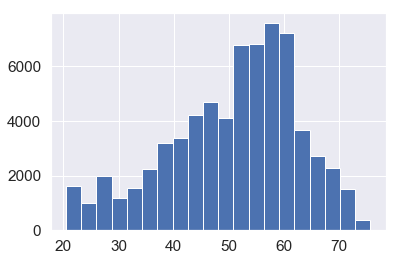

In [312]:
pano_to_const_leave = BES_census_data.set_index("pano")["leaveHanretty"]

leaveHanretty = amalgamated_pano.apply( lambda x: pano_to_const_leave.loc[int(x)] if not np.isnan(x) else x )

leaveHanretty.hist(bins=20);
# get Leave% for each constituency

# split Constituency Leave% distributions into q equally(~)populated intervals 

leaveHanretty_tenths = pd.qcut(leaveHanretty,q=10,precision=1)
leaveHanretty_tenths.value_counts().sort_index()

In [313]:
min_const_leave = leaveHanretty_tenths.cat.categories[0].left
min_const_leave = np.floor( min_const_leave / 10 )*10

max_const_leave = leaveHanretty_tenths.cat.categories[-1].right
max_const_leave = np.ceil( max_const_leave / 10 )*10



In [314]:
# bit slow because of the mean weighting
paths2015_2017 = pd.concat([LEAVE2016.groupby(by=[leaveHanretty_tenths,GE2015_2017]).apply(BES_weighted_mean),
                            LEAVE2016.groupby(by=[leaveHanretty_tenths,GE2015_2017]).sem(),
                            LEAVE2016.groupby(by=[leaveHanretty_tenths,GE2015_2017]).size() ],axis=1)
paths2015_2017.columns = ["Leave%(mean)","Leave%(standard error)","Sample Size"]
paths2015_2017[["Leave%(mean)","Leave%(standard error)"]] = paths2015_2017[["Leave%(mean)","Leave%(standard error)"]]*100


paths2015_2017 = paths2015_2017.dropna().sort_index().reset_index()
paths2015_2017.columns = ['Constituency Leave%', 'GE2015->GE2017',"Leave%(mean)","Leave%(standard error)","Sample Size"]



In [319]:
euref_var

'euRefVoteW14'

In [315]:
Treatment = "Leave_by_Leaveiness"

output_subfolder = BES_output_folder + Treatment + os.sep
if not os.path.exists( output_subfolder ):
    os.makedirs( output_subfolder )

In [321]:
vote_path_var = "GE2015->GE2017"


In [317]:
def plot_midline(x,y, color, label=None):
    plt.axhline(y=50 , alpha=.8, linestyle='--',color='grey')
    plt.plot([min_const_leave, max_const_leave],
             [min_const_leave, max_const_leave],
             alpha=.8, linestyle='--',color='g')


In [316]:
data = paths2015_2017.copy()

grouped_by_total_sample_size = paths2015_2017.groupby(vote_path_var).sum().sort_values(by="Sample Size",ascending=False)
high_sample_paths = grouped_by_total_sample_size[grouped_by_total_sample_size["Sample Size"]>500].index

# take mid-point of Const Leave interval
data["Constituency Leave%"] = data["Constituency Leave%"].apply(lambda x: int(x.mid)).astype('int')

# keep only voting paths with a total of 500 people across all Const Leave intervals
data = data[ data[vote_path_var].apply( lambda x: x in high_sample_paths) ]

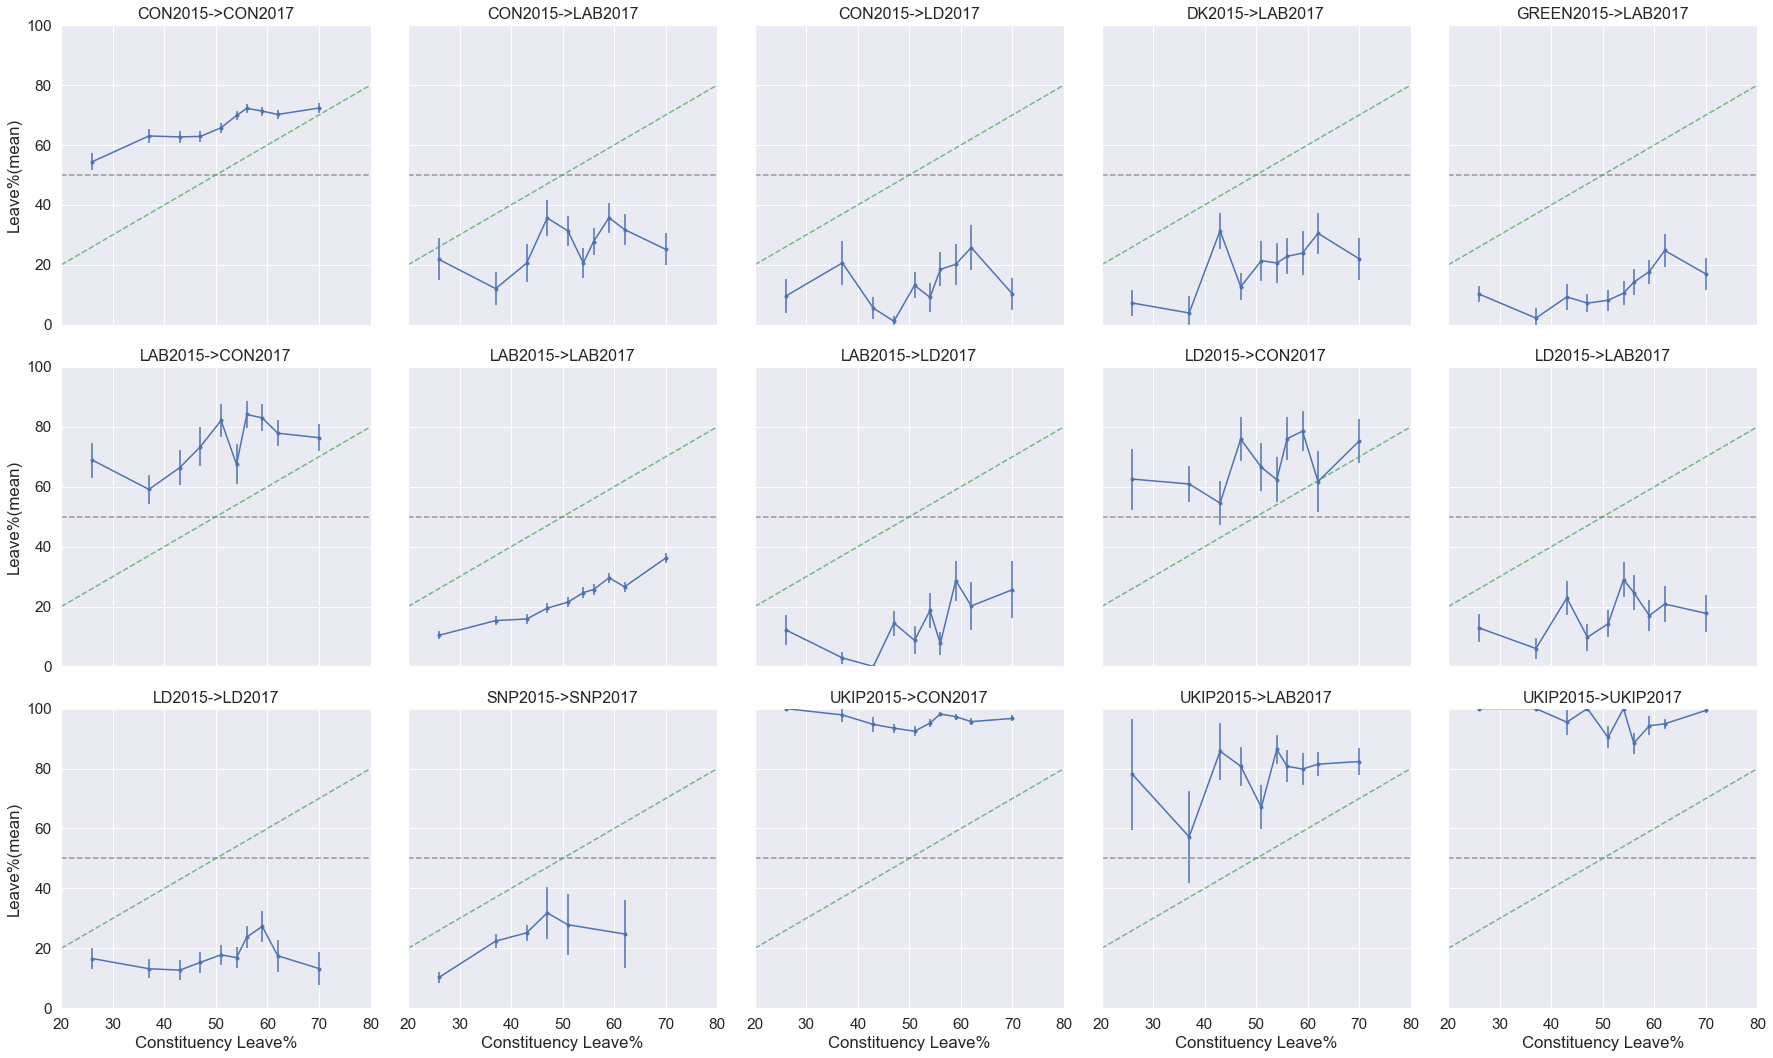

In [325]:
sns.set(font_scale=1.4)

g = sns.FacetGrid(data, col="GE2015->GE2017", col_wrap=5, height=5)
g = g.map(plot_midline, "Constituency Leave%", "Leave%(mean)")
g = g.map(plt.errorbar, "Constituency Leave%", "Leave%(mean)", "Leave%(standard error)",marker=".").set_titles("{col_name}",size=16)

g.savefig(output_subfolder +os.sep+ clean_filename("Leaveiness_by_"+vote_path_var+euref_var, char_limit=50)+".png" , bbox_inches='tight')
plt.ylim(0,100);
plt.xlim(min_const_leave,max_const_leave);



Index(['Constituency Leave%', 'GE2015->GE2017', 'Leave%(mean)',
       'Leave%(standard error)', 'Sample Size'],
      dtype='object')

Warning, filename truncated because it was over 50. Filenames may no longer be unique


Text(0.5, 0.98, 'Voter Group Leave% by Constituency Leaveiness')

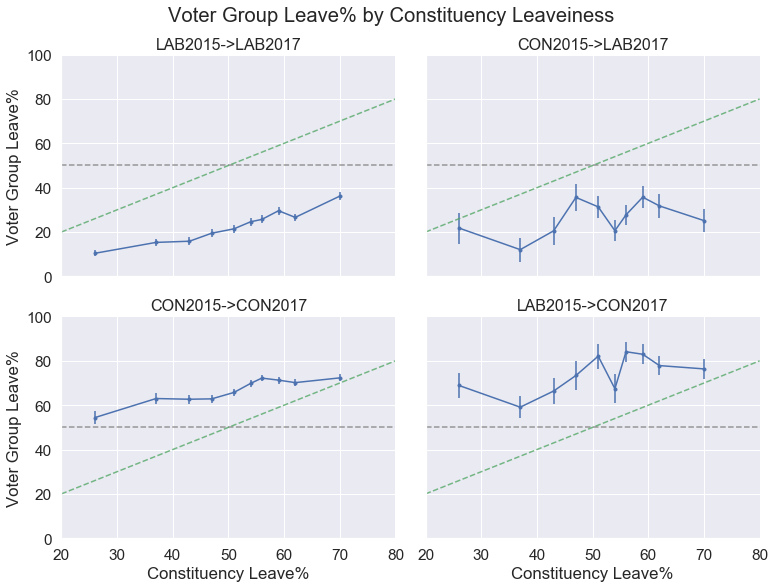

In [342]:
## LAB and CON only

sns.set(font_scale=1.4)

data.columns = ['Constituency Leave%', 'GE2015->GE2017', 'Voter Group Leave%',
       'Leave%(standard error)', 'Sample Size']

CON_LAB_ONLY = ["LAB2015->LAB2017","CON2015->LAB2017","CON2015->CON2017","LAB2015->CON2017"]

g = sns.FacetGrid(data[data["GE2015->GE2017"].apply(lambda x: x in CON_LAB_ONLY)],
                  col="GE2015->GE2017", col_wrap=2, height=4.2, aspect=1.3, col_order = CON_LAB_ONLY)
g = g.map(plot_midline, "Constituency Leave%", 'Voter Group Leave%')
g = g.map(plt.errorbar, "Constituency Leave%", 'Voter Group Leave%', "Leave%(standard error)",marker=".").set_titles("{col_name}",size=16)

g.savefig(output_subfolder +os.sep+ clean_filename("(CON_LAB_ONLY)Leaveiness_by_"+vote_path_var+euref_var, char_limit=50)+".png" , bbox_inches='tight')
plt.ylim(0,100);
plt.xlim(min_const_leave,max_const_leave);
plt.subplots_adjust( top = 1-(.1  ) )
plt.suptitle("Voter Group Leave% by Constituency Leaveiness")


In [ ]:
# vs of FacetGrid where we *don't* manually amalgamate ... but then you won't be able to use weighted means!

In [ ]:
### I SHOULD FOLLOW UP BY FINALLY LEARNING HOW TO DO MRP (hat-tip James Kanagasooriam for proposing this)

# two different python packages support this pyStan and pyMC3

# https://austinrochford.com/posts/2017-07-09-mrpymc3.html
# https://mc-stan.org/users/documentation/case-studies/radon.html

# Some warning about applying MrP
# https://thepoliticalmethodologist.com/2013/10/14/being-careful-with-multilevel-regression-with-poststratification/